https://github.com/tufts-ml-courses/comp135-20f-assignments/blob/713b94699054ede980f892201e55b067f436d9f0/labs/day12_StochasticGradientDescent.ipynb

In [3]:
import numpy as np
import sklearn.neural_network as nn
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


y = 1.234 * x + noise   

In [6]:
def create_ds(N=1000, slope=1.234, noise_stddev=.1, random_state=42):
    x_n = np.linspace(-2,2,N)
    y_n = slope * x_n + noise_stddev * np.random.randn(N)
    
    return x_n, y_n

In [9]:
X_train_n, y_train_n = create_ds(N=1000, noise_stddev=.3)
X_train_n.shape , y_train_n.shape

((1000,), (1000,))

In [10]:
X_train_n[:5]

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398])

In [11]:
y_train_n[:5]

array([-1.6381063 , -2.21614589, -2.87766438, -3.18130927, -2.64449963])

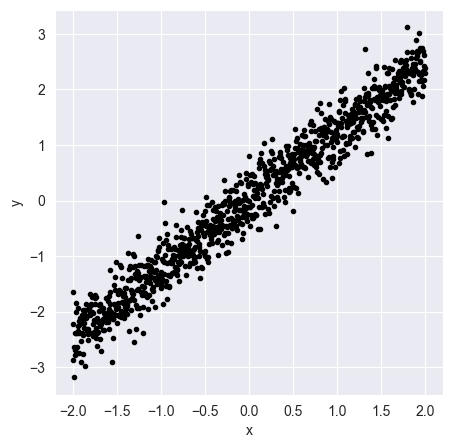

In [12]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
plt.plot(X_train_n, y_train_n,'k.');
plt.xlabel('x');plt.ylabel('y');

 For 1 variable, the cost fn of a linear regression is defined by 

j =  summation((y - y_hat)**2)/( 2 * N)

In [ ]:
def loss_function(x,y,m,b):
    '''
    x ndarray shape m, input
    y ndarray shape n, label
    m,b parameters 
    '''
    #y_hat = m * x + b

Stochastic estimates of the loss

In [4]:
import numpy as np
G = 101
w_grid = np.linspace(-3,8,G) # create array of 101 length between -3 and 8
print(w_grid)

[-3.   -2.89 -2.78 -2.67 -2.56 -2.45 -2.34 -2.23 -2.12 -2.01 -1.9  -1.79
 -1.68 -1.57 -1.46 -1.35 -1.24 -1.13 -1.02 -0.91 -0.8  -0.69 -0.58 -0.47
 -0.36 -0.25 -0.14 -0.03  0.08  0.19  0.3   0.41  0.52  0.63  0.74  0.85
  0.96  1.07  1.18  1.29  1.4   1.51  1.62  1.73  1.84  1.95  2.06  2.17
  2.28  2.39  2.5   2.61  2.72  2.83  2.94  3.05  3.16  3.27  3.38  3.49
  3.6   3.71  3.82  3.93  4.04  4.15  4.26  4.37  4.48  4.59  4.7   4.81
  4.92  5.03  5.14  5.25  5.36  5.47  5.58  5.69  5.8   5.91  6.02  6.13
  6.24  6.35  6.46  6.57  6.68  6.79  6.9   7.01  7.12  7.23  7.34  7.45
  7.56  7.67  7.78  7.89  8.  ]


In [5]:
loss_grid = np.zeros(G)
loss_grid

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for gg in range(G):
    loss_grid[gg] = 